In [5]:
import cv2
import albumentations as A
import numpy as np
from utils import plot_examples
from PIL import Image
import seaborn as sns
sns.set()

In [6]:
image = Image.open("images/elon.jpeg")
mask = Image.open("images/mask.jpeg")
mask_2 = Image.open("images/second_mask.jpeg")

In [7]:
transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        # If you don't want to have reflections after rotation
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.1),
        A.VerticalFlip(0.5),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25),
        A.OneOf(# Choose random transformation
            [
                A.Blur(blur_limit=3, p=0.5),
                A.ColorJitter(p=0.5),
                
            ], p=1.0), # Chance to use one of these transforms 
     ]
)

In [8]:
images_list = [image]
image = np.array(image)
mask = np.array(mask)
mask_2 = np.array(mask_2)
for i in range(5):
    augmentation = transform(image=image, masks=[mask, mask_2]) # mask=mask
    augmented_img = augmentation["image"]
    # augmented_mask = augmentation["mask"]
    augmented_masks = augmentation["masks"]
    images_list.append(augmented_img)
    # images_list.append(augmented_mask)
    images_list.append(augmented_masks[0])
    images_list.append(augmented_masks[1])

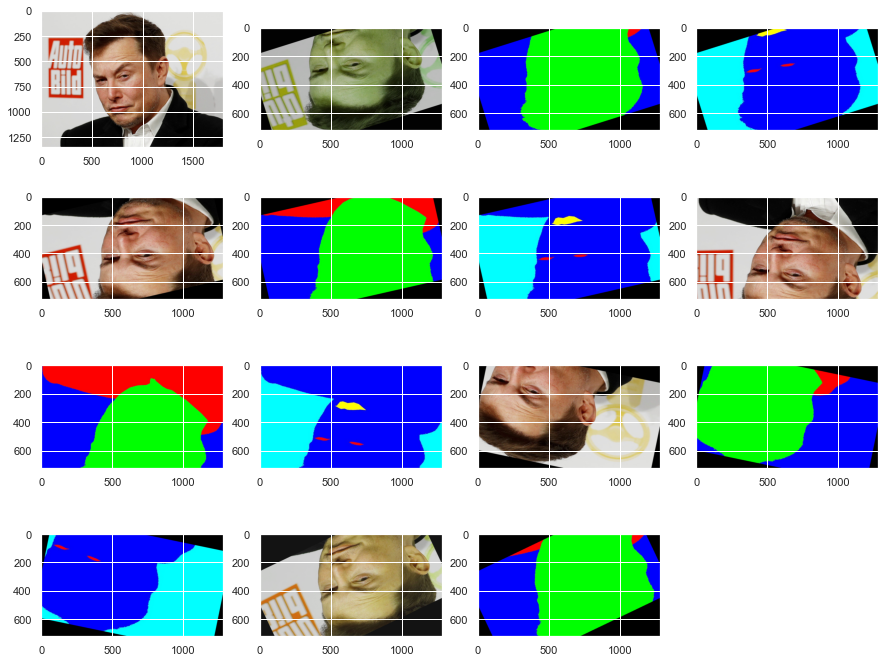

In [9]:
plot_examples(images_list)

In [10]:
print(augmentation)

{'image': array([[[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       ...,

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]],

       [[19, 19, 19],
        [19, 19, 19],
        [19, 19, 19],
        ...,
        [19, 19, 19],
        [19, 19, 19],
        [19, 19, 19]]], dtype=uint8), 'masks': [array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
 